<a href="https://colab.research.google.com/github/glorivaas/Machine_Learning25/blob/main/LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**LAB 1- PCA**
## Author : Gloria Rivas Nóvoa
## **Primary Question**
*Perform PCA on the dataset and visualizes the first two principal components*


In [ ]:
import pandas as pd
df = pd.read_csv('/content/pca.csv')
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

print("Column Names:")
print(df.columns)

print("\nColumn Types:")
print(df.dtypes)

print("\nFirst 5 Rows:")
print(df.head())

print("\nCounts of each class:")
unique, counts = np.unique(df['class'], return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)
print("Overall length:", len(df['class']))

Column Names:
Index(['x', 'y', 'z', 'class'], dtype='object')

Column Types:
x        float64
y        float64
z        float64
class      int64
dtype: object

First 5 Rows:
          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0

Counts of each class in y:
{0: 100, 1: 100, 2: 100}
Overall length: 300


In [ ]:
X = df[['x', 'y', 'z']]

X = X - np.mean(X, axis=0)
X = X / np.std(X, axis=0)
U, SIGMA, VT = np.linalg.svd(X)
SIGMAfull = np.zeros((X.shape[0], X.shape[1]))
np.fill_diagonal(SIGMAfull, SIGMA)

variance_estimators = (SIGMA ** 2) / (X.shape[0] - 1)

XV = U @ SIGMAfull

print("\nVT, having the principal components in rows\n")
print(VT)

print("\nX projected on V (first 5 rows)\n")
print(XV[:5,:])
print("\nVariance estimators\n")
print(variance_estimators)
print("\nExplained percentage variance\n")
print(variance_estimators / sum(variance_estimators))
print("\nCumulative explained percentage variance\n")
print(np.cumsum(variance_estimators / sum(variance_estimators)))


VT, having the principal components in rows

[[-0.72005783 -0.56946     0.39652494]
 [ 0.02368275 -0.59126692 -0.80612813]
 [ 0.69350981 -0.57106806  0.43923275]]

X projected on V (first 5 rows)

[[ 1.12582206 -0.05986874 -0.0309145 ]
 [ 1.89368654 -0.95808305  0.24333978]
 [ 1.61886158 -1.39907438 -0.17470912]
 [ 1.61654666  0.01318696 -0.22298896]
 [ 2.41865284  0.83294294 -0.20878659]]

Variance estimators

[1.04515213 1.0066104  0.95827091]

Explained percentage variance

[0.34722276 0.33441835 0.31835889]

Cumulative explained percentage variance

[0.34722276 0.68164111 1.        ]


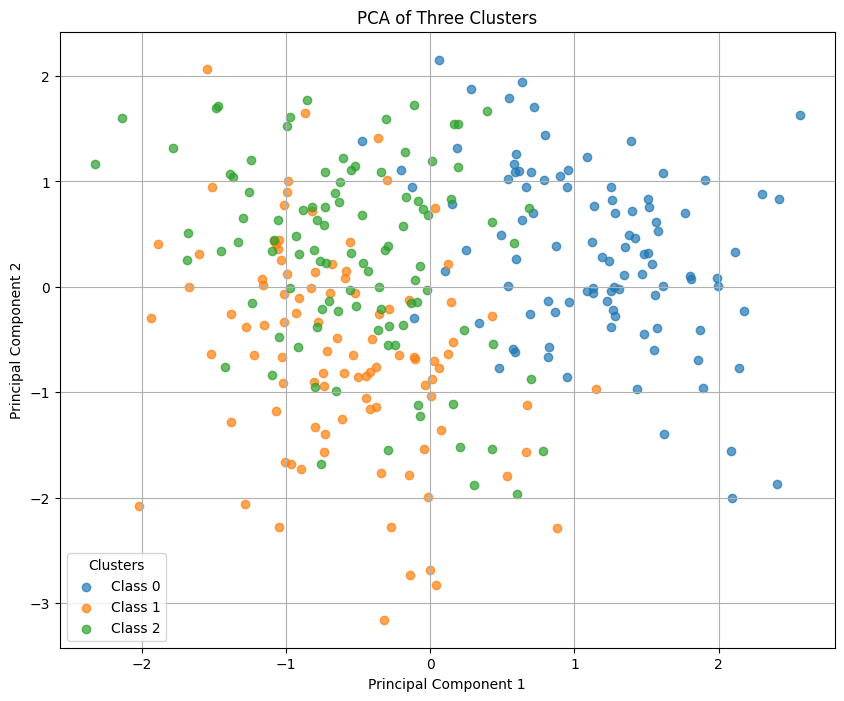

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10, 8))
y = df['class'].values
target_names = np.unique(y)
for i, target_name in enumerate(target_names):
    plt.scatter(XV[y == i, 0], XV[y == i, 1], label=f'Class {target_name}', alpha=0.7)

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA of Three Clusters")
plt.legend(title="Clusters")
plt.grid(True)
plt.show()

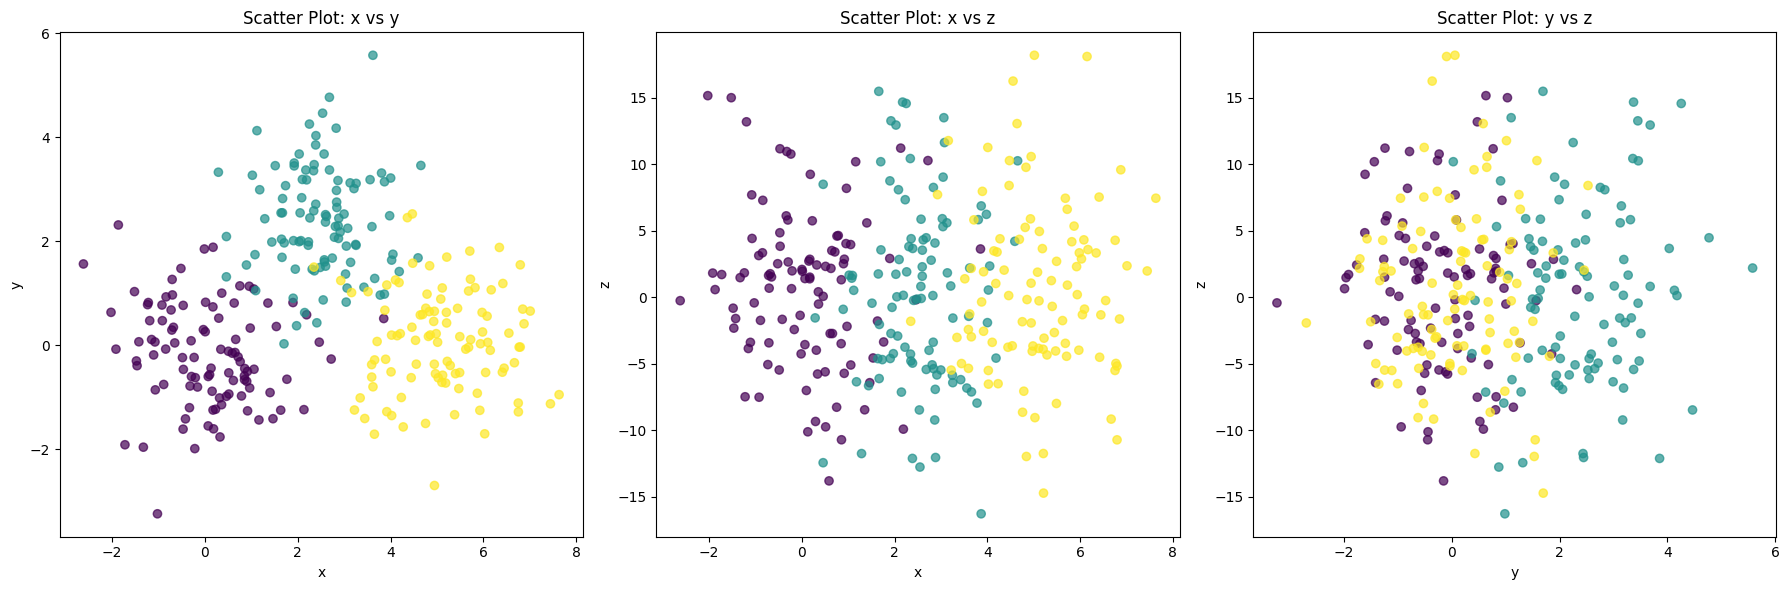

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
axes[0].scatter(df['x'], df['y'], c=df['class'], cmap='viridis', alpha=0.7)
axes[0].set_xlabel('x')
axes[0].set_ylabel('y')
axes[0].set_title('Scatter Plot: x vs y')

axes[1].scatter(df['x'], df['z'], c=df['class'], cmap='viridis', alpha=0.7)
axes[1].set_xlabel('x')
axes[1].set_ylabel('z')
axes[1].set_title('Scatter Plot: x vs z')

axes[2].scatter(df['y'], df['z'], c=df['class'], cmap='viridis', alpha=0.7)
axes[2].set_xlabel('y')
axes[2].set_ylabel('z')
axes[2].set_title('Scatter Plot: y vs z')

plt.tight_layout()
plt.show()

We observe that:

- $x$ vs $y$:

 - Shows clear cluster separation; three groups with minimal overlap.

- $x$ vs $z$:

 - More spread out but some overlap is present.
Less separation than x vs y.

- $y$ vs $z$:

 - Poorer separation, clusters overlap significantly making it harder to distinguish the three groups.

***Does PCA improve the separation of data points from different clusters compared to the original feature spaces? Explain why.***

No. We see that PCA helps separate the classes, but not significantly better than x vs y. We can observe that some overlap remains, meaning PCA did not create perfect separation. Then we conclude that PCA was good for reducing dimensionallity, but x vs y already provided good separation.

This occurs due to the fact that PCA maximizes variance, not class separation.

Now, the same but using standard PCA libraries

Column Names:
Index(['x', 'y', 'z', 'class'], dtype='object')

Column Types:
x        float64
y        float64
z        float64
class      int64
dtype: object

First 5 Rows:
          x         y          z  class
0  0.647689 -0.138264   3.512299      0
1 -0.234137 -0.234153  10.769447      0
2 -0.469474  0.767435  11.166721      0
3 -0.465730 -0.463418   3.836479      0
4 -1.724918 -1.913280   1.710932      0

Counts of each class:
{0: 100, 1: 100, 2: 100}
Overall length: 300


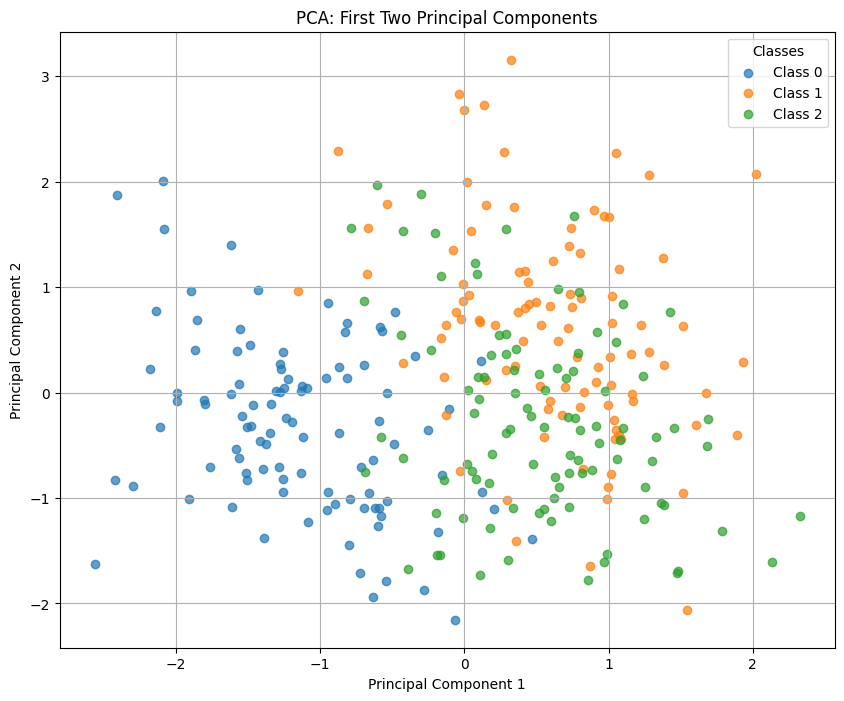

In [2]:
# 1️⃣ Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# 2️⃣ Load the dataset
df = pd.read_csv('/content/PCA_three_clusters_data.csv')

# 3️⃣ Display dataset info
print("Column Names:")
print(df.columns)

print("\nColumn Types:")
print(df.dtypes)

print("\nFirst 5 Rows:")
print(df.head())

print("\nCounts of each class:")
unique, counts = np.unique(df['class'], return_counts=True)
class_counts = dict(zip(unique, counts))
print(class_counts)
print("Overall length:", len(df['class']))

# 4️⃣ Select numeric columns for PCA (excluding 'class' column)
features = df.drop(columns=['class'])  # Exclude the class column

# 5️⃣ Standardize the data (PCA works best with normalized data)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(features)

# 6️⃣ Apply PCA to reduce dimensions to 2
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)

# 7️⃣ Create a new DataFrame with PCA results
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
pca_df['class'] = df['class']  # Keep class labels

# 8️⃣ Plot PC1 vs PC2 (scatter plot)
plt.figure(figsize=(10, 8))
for target in np.unique(pca_df['class']):
    plt.scatter(
        pca_df.loc[pca_df['class'] == target, 'PC1'],
        pca_df.loc[pca_df['class'] == target, 'PC2'],
        label=f'Class {target}',
        alpha=0.7
    )

plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("PCA: First Two Principal Components")
plt.legend(title="Classes")
plt.grid(True)
plt.show()


##Secondary Question
**Why is standardization necessary before applying PCA?**

PCA is indeed sesitive to the scale. This is because if the features have different scales, PCA would be biased towards those with larger values, giving distorted results.
When we standirize, we give the same scale to all the features, preventing that some feautures dominate over others.

